KD

1/16/25 

Data Science II (Intensive)

https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset
## World Cup 2022 Statistics

## Table of Contents:
[Introduction](Introduction)

[Dataset](#Dataset)

[Goals by Country](#Goals-by-Country)

[Correlation Between Defensive Pressure and Team Passes](#Correlation-Between-Defensive-Pressure-and-Team-Passes)

[Possession by Team](#Possession-by-Team)

[Conclusion](#Conclusion)






## Introduction:

This data set shows many different statistics from every single soccer game in the 2022 World Cup. Rather than gathering cumulative information and presenting the total statistics for each team, this data set presents the statistics from each game. It contains statistics like goals scored, possession percentage, yellow and red cards, fouls, and more. I chose to create three plots that show which countries score the most goals, how the way a team applies defensive pressure correlates to possession/total passes, and which teams keep the most possession of the ball.

## Dataset:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import plotly.express as px
import pycountry as pc
df = pd.read_csv('Fifa_world_cup_matches.csv')

In [2]:
plt.style.use('ggplot')
df.head()
df.columns
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [3]:
df.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


## Goals by Country
This data set shows a world map, highlighting which countries scored the most goals in the tournament. The map is color coded, so that countries with more goals will have a lighter color than countries with fewer goals (purple to yellow). I found this dataset interesting, as it showed the regional trends in world football (soccer). Teams like Portugal and Brazil have always been known to be very effective in offense, so it was interesting to see that they continued to lead in goals, even when they did not go the full length. I also found it interesting to see that the top scorers were in close proximity to each other, showing how sports culture has spread throughout history.

In [4]:
def get_iso3(country_name):
    try:
        return pc.countries.lookup(country_name).alpha_3
    except LookupError:
        return None 
    
df['ISO31'] = df['team1'].apply(get_iso3)
df['ISO32'] = df['team2'].apply(get_iso3)

df['total_goals_team1'] = df['number of goals team1']
df['total_goals_team2'] = df['number of goals team2']

df_goals = df.groupby('ISO31').agg({'total_goals_team1': 'sum'}).reset_index()
df_goals2 = df.groupby('ISO32').agg({'total_goals_team2': 'sum'}).reset_index()


df_total_goals = pd.concat([df_goals, df_goals2], axis=0)
df_total_goals = df_total_goals.groupby('ISO31').agg({'total_goals_team1': 'sum'}).reset_index()

fig = px.choropleth(
    df_total_goals,
    locations='ISO31',
    color='total_goals_team1',
    title='Total Goals by Country in World Cup 2022',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()

## Correlation Between Defensive Pressure and Team Passes
This dataset shows the correlation between how much a team applies defensive pressure, and how many passes they complete. What this data shows, is that the teams that press most are less likely to also be better in possession. This confirms a common theory in world football (soccer), where high pressing teams rely more on athleticism, than technical ability. Teams that apply high pressure, like Australia, for example, often rely on a tactic called "counterattacking," which requires sheer athleticism in order to win the ball back, and break opponents' defensive lines before they are able to reset their formation; in other words, their plan is to head straight for goal with numbers, which sacrifices time on the ball (and, therefore, number of passes). 



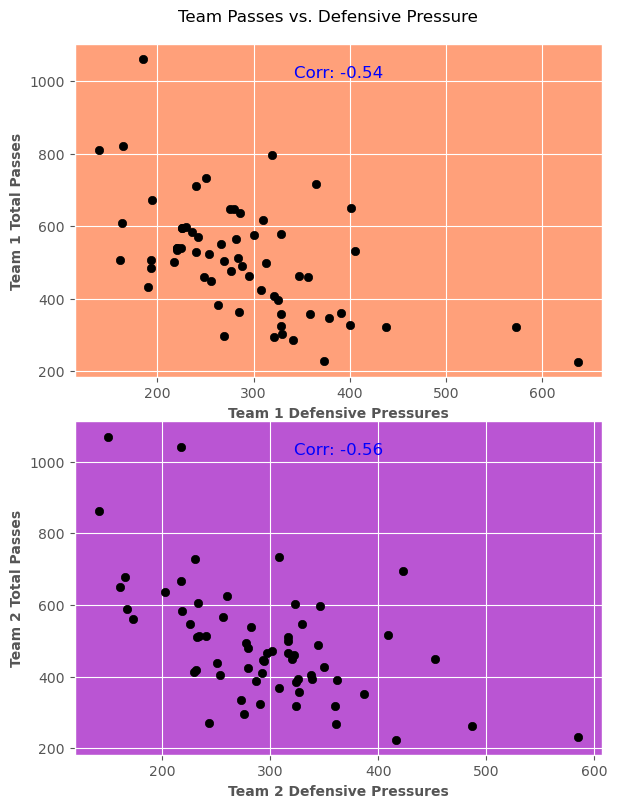

In [5]:
from scipy.stats import pearsonr

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(6, 8))
fig.suptitle('Team Passes vs. Defensive Pressure')
ax1.set_facecolor('lightsalmon')
ax2.set_facecolor('mediumorchid')
fig.subplots_adjust(hspace=0.5)
fig.tight_layout()
x = 'defensive pressures applied team1'
y = 'passes team1'
ax1.scatter(df[x], df[y], color='black', marker='o')
ax1.set_xlabel('Team 1 Defensive Pressures', fontweight='bold', fontsize='10')
ax1.set_ylabel('Team 1 Total Passes', fontweight='bold', fontsize='10')

corr1, _ = stats.pearsonr(df[x], df[y])
ax1.annotate(f'Corr: {corr1:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='blue')


x = 'defensive pressures applied team2'
y = 'passes team2'
ax2.scatter(df[x], df[y], color='black', marker='o')
ax2.set_xlabel('Team 2 Defensive Pressures', fontweight='bold', fontsize='10')
ax2.set_ylabel('Team 2 Total Passes', fontweight='bold', fontsize='10')

corr2, _ = stats.pearsonr(df[x], df[y])
ax2.annotate(f'Corr: {corr2:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='blue')


plt.show()

## Possession by Team
I chose this dataset, as I wanted to analyze how different national teams kept possession of the ball, and if the teams who consistently kept the most possession of the ball were also the teams who won more games. This dataset shows, not only which teams were able to achieve the highest percentage of possession in one game, but also the teams' patterns. What this dataset showed me was that the teams who went furthest in the tournament (France, Argentina), had drastic variety in their possession; this exemplifies the importance of being able to adapt depending on the opponent. Spain, for example, had a very predictable play style during this tournament: building slowly, and maintaining the vast majority of possession (they did not go very far).   

In [6]:
df_sorted = df.sort_values(by="possession team1", ascending=True)

fig = px.bar(
    df_sorted, 
    x="team1", 
    y="possession team1",
    color='team1',
    labels={"possession team1": "Possession (%)", "team1": "Match"},
    title="Possession Percentages per Team (Sorted by Increasing Percentage)"
)

fig.show()

## Conclusion:
This project expanded my knowledge for the sport. In addition to visualizing regional trends, this project gave me new insights into the strategies that teams are using today, in modern soccer, what they imply, and how effective they are in comparison to other teams' strategies.